# AI Project - Build A Heart Attack Predictor

#### Scope Of Project:
Build a heart attack predictor based on past diagnostic data of patients using a machine learning model such as Logistic Regression or Decision Tree

### Step 1: Import the libraries

In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plot
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from tabulate import tabulate
from sklearn import tree, metrics, linear_model
from matplotlib.colors import ListedColormap 
import io

### Step 2: Import and the data

In [117]:
credRisk ="./heart_disease_data.csv"
data = pd.read_csv(credRisk, sep=",")

### Step 3: Analyze data Informations

In [118]:
data.shape

(303, 14)

In [119]:
data.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [121]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Step 4: Analyze the exploratory data

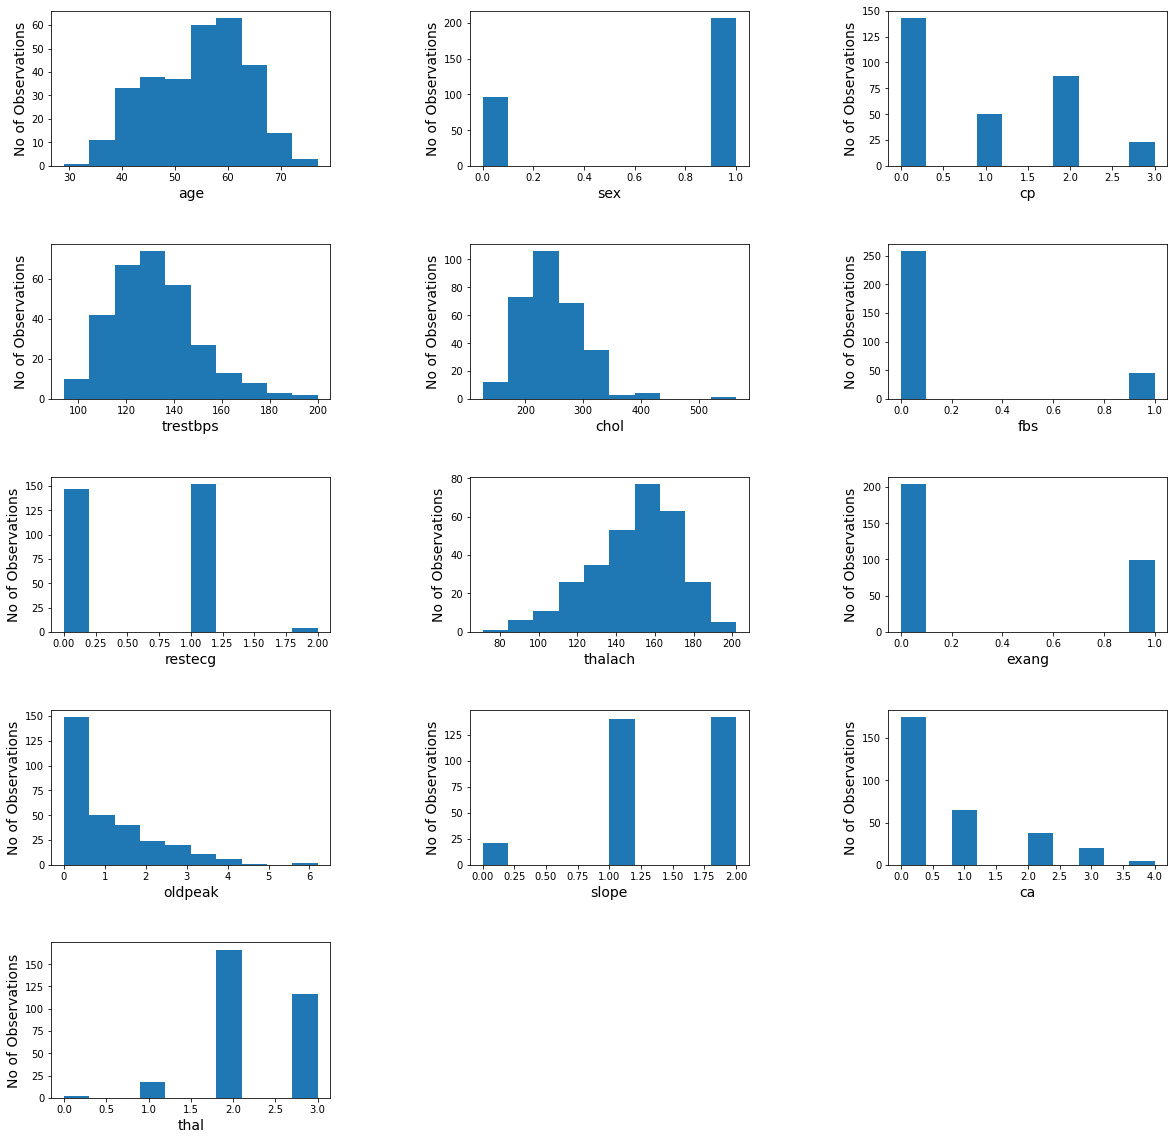

In [122]:
fig = plot.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, columns in zip(range(1, 14),data.columns):
    ax = fig.add_subplot(5, 3, i)
    ax.hist(data[columns])
    plot.xlabel(columns, fontsize="14")
    plot.ylabel('No of Observations', fontsize="14")


### Step 5: Get the plotting of target

In [123]:
count=data.groupby(data["target"])['target'].count()
print(count)

target
0    138
1    165
Name: target, dtype: int64


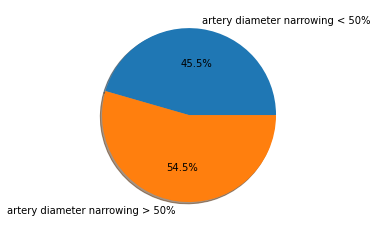

In [124]:
plot.pie(count, autopct='%1.1f%%', shadow=True, labels=['artery diameter narrowing < 50%','artery diameter narrowing > 50%']);

# Method 1: Decision Tree

## Validation Method 1: Train_Test Method


### Step 6: Split the data into test and training data

In [125]:
data_train,data_test=train_test_split(data,test_size=0.3,random_state=1)

### Step 7: Basic Information on Testing and Training Data

In [126]:
data_train.shape

(212, 14)

In [127]:
data_test.shape

(91, 14)

In [128]:
names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
x_train=data_train[names[:-1]]
x_test=data_test[names[:-1]]

y_train=data_train['target']
y_test=data_test['target']

### Step 8: Decision Tree with Entropy Criteria

In [129]:
dtree=DecisionTreeClassifier(criterion='entropy',random_state=0
                             ,min_samples_leaf=10
                            ,min_samples_split=10)

### Step 9: Train the Decision Tree 

In [130]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Step 10: Validate the Decision Tree

In [131]:
y_pred_entropy=dtree.predict(x_test)
y_pred_entropy

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

### Step 11: Measure the Accuracy of Decision Tree

In [132]:
entropy=accuracy_score(y_test,y_pred_entropy)
Accuracy_entropy=round(entropy*100,2)
print("Accuracy: %0.2f" % (Accuracy_entropy))
cm1=metrics.confusion_matrix(y_test,y_pred_entropy)
print(cm1)

Accuracy: 73.63
[[28 13]
 [11 39]]


### Step 12: Plot the Decision tree

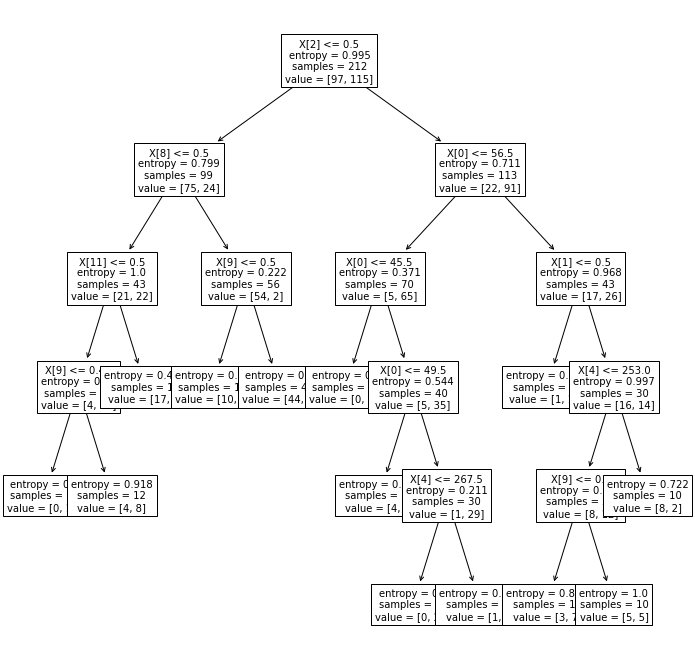

In [133]:
fig, ax = plot.subplots(figsize=(12, 12))
tree.plot_tree(dtree,fontsize=10);
plot.show()

### Step 13: Decision Tree with Gini Criteria

In [134]:
dtree.gini=DecisionTreeClassifier(criterion='gini',random_state=0
                             ,min_samples_leaf=10
                            ,min_samples_split=10)

### Step 14: Train the Gini Decision Tree 

In [135]:
dtree.gini.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Step 15: Validate the Gini Decision Tree

In [136]:
y_pred_gini=dtree.gini.predict(x_test)
y_pred_gini

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1], dtype=int64)

### Step 16: Measure the Accuracy of Gini Decision Tree

In [137]:
gini=accuracy_score(y_test,y_pred_gini)
Accuracy_gini=round(gini*100,2)
print("Accuracy: %0.2f" % (Accuracy_gini))
cm2=metrics.confusion_matrix(y_test,y_pred_gini)
print(cm2)

Accuracy: 67.03
[[29 12]
 [18 32]]


### Step 17: Plot the Gini Decision tree

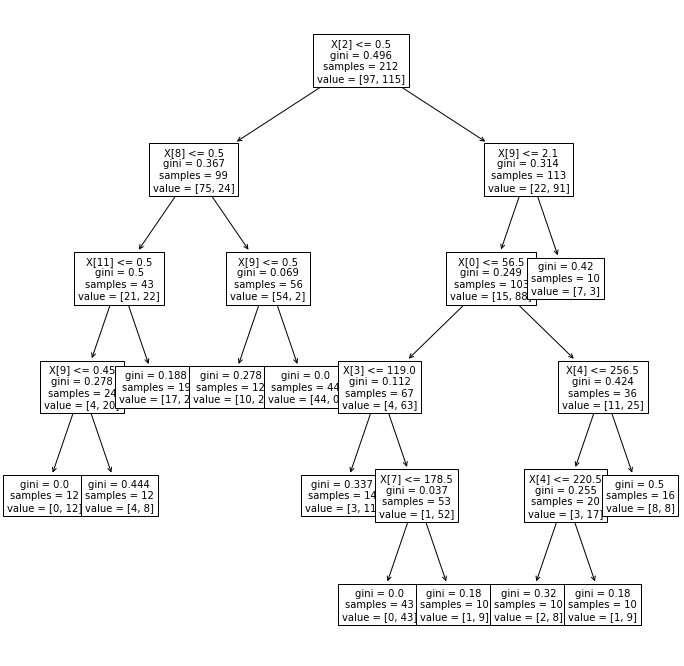

In [138]:
fig, ax = plot.subplots(figsize=(12, 12))
tree.plot_tree(dtree.gini,fontsize=10);
plot.show()

## Validation Method 2:  K- fold Method

### Step 18: Split the data into 4 folds via K-fold methods

In [139]:
kfold= KFold(n_splits=4, random_state=1, shuffle=True)

### Step 19: Train the Decision Tree(Entropy) and test it

In [140]:
for train, test in kfold.split(data):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[names[:-1]]
    x_test=data_test[names[:-1]]

    y_train=data_train['target']
    y_test=data_test['target']
    
    dtree.fit(x_train,y_train)
y_pred_entropy = cross_val_predict(dtree, x_test, y_test, cv=4)
y_pred_entropy

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

### Step 20: Measure the accuracy and its standard Deviation

In [141]:
all_accuracies = cross_val_score(estimator=dtree, X=x_train, y=y_train, cv=4)
print(all_accuracies)
kfold_entropy_accuracy=round(all_accuracies.mean()*100,2)
kfold_entropy_std=all_accuracies.std()
print("Accuracy: %0.2f +/- %0.3f" % (kfold_entropy_accuracy,kfold_entropy_std))
cm3=metrics.confusion_matrix(y_test,y_pred_entropy)
print(cm3)

[0.84210526 0.85964912 0.66666667 0.78947368]
Accuracy: 78.95 +/- 0.075
[[21  7]
 [13 34]]


### Step 21: Train the Gini Decision Tree and test it

In [142]:
for train, test in kfold.split(data):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[names[:-1]]
    x_test=data_test[names[:-1]]

    y_train=data_train['target']
    y_test=data_test['target']
    
    dtree.gini.fit(x_train,y_train)
y_pred_gini = cross_val_predict(dtree.gini, x_test, y_test, cv=4)
y_pred_gini

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

### Step 22: Measure the accuracy and its standard Deviation

In [143]:
all_accuracies = cross_val_score(estimator=dtree.gini, X=x_train, y=y_train, cv=4)
print("Accuracy with each fold: %s" % (all_accuracies)) 
kfold_gini_accuracy=round(all_accuracies.mean()*100,2)
kfold_gini_std=all_accuracies.std()
print("Accuracy: %0.2f +/- %0.3f" % (round(all_accuracies.mean()*100,2), all_accuracies.std()))
cm4=metrics.confusion_matrix(y_test,y_pred_gini)
print(cm4)

Accuracy with each fold: [0.84210526 0.85964912 0.66666667 0.78947368]
Accuracy: 78.95 +/- 0.075
[[21  7]
 [13 34]]


## Validation Method 3:  ShuffleSplit Method

### Step 23: Split the data into 4 splits via ShuffleSplit methods

In [144]:
shufflesplit = ShuffleSplit(n_splits=4, random_state=42, test_size=0.3)


### Step 24: Train the Decision Tree(Entropy) and test it

In [145]:
for train, test in shufflesplit.split(data[names[:-1]],data['target']):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[names[:-1]]
    x_test=data_test[names[:-1]]

    y_train=data_train['target']
    y_test=data_test['target']
    
    dtree.fit(x_train,y_train)
y_pred_entropy = cross_val_predict(dtree, x_test, y_test, cv=4)
y_pred_entropy

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

### Step 25: Measure the accuracy and its standard Deviation

In [146]:
all_accuracies = cross_val_score(estimator=dtree, X=x_train, y=y_train, cv=4)
print("Accuracy with each shuffle: %s" % (all_accuracies)) 
shuffle_split_entropy_accuracy=round(all_accuracies.mean()*100,2)
shuffle_split_entropy_std=all_accuracies.std()
print("Accuracy: %0.2f +/- %0.3f" % (round(all_accuracies.mean()*100,2), all_accuracies.std()))
cm5=metrics.confusion_matrix(y_test,y_pred_entropy)
print(cm5)

Accuracy with each shuffle: [0.75471698 0.86792453 0.8490566  0.77358491]
Accuracy: 81.13 +/- 0.048
[[21 20]
 [13 37]]


### Step 26: Train the Decision Tree(Entropy) and test it

In [147]:
for train, test in shufflesplit.split(data[names[:-1]],data['target']):
    data_train, data_test = data.iloc[train], data.iloc[test]
    
    x_train=data_train[names[:-1]]
    x_test=data_test[names[:-1]]

    y_train=data_train['target']
    y_test=data_test['target']
    
    dtree.gini.fit(x_train,y_train)
y_pred_gini = cross_val_predict(dtree.gini, x_test, y_test, cv=4)
y_pred_gini

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1], dtype=int64)

### Step 27: Measure the accuracy and its standard Deviation

In [148]:
all_accuracies = cross_val_score(estimator=dtree.gini, X=x_train, y=y_train, cv=4)
print("Accuracy with each shuffle: %s" % (all_accuracies)) 
shuffle_split_gini_accuracy=round(all_accuracies.mean()*100,2)
shuffle_split_gini_std=all_accuracies.std()
print("Accuracy: %0.2f +/- %0.3f" % (round(all_accuracies.mean()*100,2), all_accuracies.std()))
cm6=metrics.confusion_matrix(y_test,y_pred_gini)
print(cm6)

Accuracy with each shuffle: [0.79245283 0.86792453 0.83018868 0.77358491]
Accuracy: 81.60 +/- 0.036
[[15 26]
 [11 39]]


# Method 2: Logistic Regression

### Step 28: Split the data into test and training data

In [149]:
data_train,data_test=train_test_split(data,test_size=0.3,random_state=1)
x_train=data_train[names[:-1]]
x_test=data_test[names[:-1]]

y_train=data_train['target']
y_test=data_test['target']

## LR Method 1: Lasso Penalty

### Step 29: Create LR1 model

In [150]:
LR1=linear_model.LogisticRegression(random_state=0,solver='liblinear',multi_class='ovr',penalty='l1',C=0.1)

### Step 30: Train the LR1 model

In [151]:
LR1.fit(X=x_train,y=y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Step 31: Test the LR1 model from testing data

In [152]:
y_pred1=LR1.predict(x_test)

### Step 32: Find the Accurracy of LR1 model

In [153]:
score1=LR1.score(x_test,y_test)
print(score1)
cm7=metrics.confusion_matrix(y_test,y_pred1)
print(cm7)

0.7362637362637363
[[29 12]
 [12 38]]


## LR Method 2: Ridge Penalty

### Step 33: Create LR2 model

In [154]:
LR2=linear_model.LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr',penalty='l2',C=0.1)

### Step 34: Train the LR1 model

In [155]:
LR2.fit(X=x_train,y=y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

### Step 35: Test the LR2 model from testing data

In [156]:
y_pred2=LR2.predict(x_test)

### Step 36:  Find the Accurracy of LR1 model

In [157]:
score2=LR2.score(x_test,y_test)
print(score2)
cm8=metrics.confusion_matrix(y_test,y_pred2)
print(cm8)

0.7802197802197802
[[29 12]
 [ 8 42]]


## Final Output 

In [160]:
print ("\t\t\t\tAccuracy by various Validation Method of decision tree")
print(tabulate([['Train-test split  :', Accuracy_entropy, cm1, Accuracy_gini, cm2], ['Kfold(4-fold):','%0.2f +/- %0.3f'%(kfold_entropy_accuracy,kfold_entropy_std),cm3, '%0.2f +/- %0.3f'%(kfold_gini_accuracy,kfold_gini_std), cm4 ],["Shuffle_split:",'%0.2f +/- %0.3f'%(shuffle_split_entropy_accuracy,shuffle_split_entropy_std),cm5,'%0.2f +/- %0.3f'%(shuffle_split_gini_accuracy,shuffle_split_gini_std),cm6]], headers=['Validation Methods', 'Entropy Method','Entropy confusion Matrix','Gini Method','Gini confusion Matrix']))
print ("\t\t\t\tAccuracy by various Penalty Method of Logisitic Regression")
print(tabulate([['Lasso Penalty   :', score1, cm7], ['Ridge Penalty   :', score2, cm8]], headers=['Penalty Methods', 'Accuracy','Confusion Matrix']))

				Accuracy by various Validation Method of decision tree
Validation Methods    Entropy Method    Entropy confusion Matrix    Gini Method      Gini confusion Matrix
--------------------  ----------------  --------------------------  ---------------  -----------------------
Train-test split  :   73.63             [[28 13]                    67.03            [[29 12]
                                         [11 39]]                                     [18 32]]
Kfold(4-fold):        78.95 +/- 0.075   [[21  7]                    78.95 +/- 0.075  [[21  7]
                                         [13 34]]                                     [13 34]]
Shuffle_split:        81.13 +/- 0.048   [[21 20]                    81.60 +/- 0.036  [[15 26]
                                         [13 37]]                                     [11 39]]
				Accuracy by various Penalty Method of Logisitic Regression
Penalty Methods      Accuracy  Confusion Matrix
-----------------  ----------  ----------------

Hence the Gini Criteria with shuffle split provide greatest result. In LR Methods LR with Ridge Penalty Provide greatest Result

# THE END